## Addressing missing values in `year`

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

scriptum_df = pd.read_json("https://raw.githubusercontent.com/CCS-ZCU/scriptum/refs/heads/master/data/files_df.json")


In [61]:
def percentage(m,n):
    return round(m/n*100, 3)

N = scriptum_df.shape[0]
num_missing_year = scriptum_df[scriptum_df.year.isna()].shape[0]
num_missing_year_samizdat = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="samizdat")].shape[0]
num_missing_year_exil = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="exil")].shape[0]

print('\tMissing year')
print(f'Overall: {num_missing_year} -- {percentage(num_missing_year, N)}%')
print(f'Samizdat: {num_missing_year_samizdat} -- {percentage(num_missing_year_samizdat, N)}%')
print(f'Exil: {num_missing_year_exil} -- {percentage(num_missing_year_exil, N)}%')

	Missing year
Overall: 1144 -- 9.85%
Samizdat: 236 -- 2.032%
Exil: 908 -- 7.818%


In [62]:
# Extract year from filename for rows with no year
mask = scriptum_df['year'].isna()
for idx in scriptum_df[mask].index:
    filename = scriptum_df.at[idx, 'filename']
    if match := re.search(r"\d{4}(?!\d)", filename):
        scriptum_df.at[idx, 'year'] = float(match.group())

In [63]:
num_missing_year = scriptum_df[scriptum_df.year.isna()].shape[0]
num_missing_year_samizdat = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="samizdat")].shape[0]
num_missing_year_exil = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="exil")].shape[0]

print('\tMissing year')
print(f'Overall: {num_missing_year} -- {percentage(num_missing_year, N)}%')
print(f'Samizdat: {num_missing_year_samizdat} -- {percentage(num_missing_year_samizdat, N)}%')
print(f'Exil: {num_missing_year_exil} -- {percentage(num_missing_year_exil, N)}%')

	Missing year
Overall: 265 -- 2.282%
Samizdat: 229 -- 1.972%
Exil: 36 -- 0.31%


In [64]:
mask = scriptum_df['year'].isna()
for idx in scriptum_df[mask].index:
    filename = scriptum_df.at[idx, 'filename']
    if '88' in filename:
        scriptum_df.at[idx, 'year'] = 1988.0
    elif '89' in filename:
        scriptum_df.at[idx, 'year'] = 1989.0
    elif '87' in filename:
        scriptum_df.at[idx, 'year'] = 1987.0
    elif '51' in filename and scriptum_df.at[idx, 'filename'] == 'novy-brak_05_chybi-str-51_ocr.txt':
        # see https://scriptum.cz/cs/periodika/novy-brak
        scriptum_df.at[idx, 'year'] = 1983.0
    elif '71' in filename:
        # see https://scriptum.cz/cs/periodika/poradni-svitek
       continue
    else:
        continue

scriptum_df.loc[scriptum_df['periodical_title'] == 'Bulletin NMS v Liberci', 'year'] = 1989.0

All alterations seem legible

In [65]:
num_missing_year = scriptum_df[scriptum_df.year.isna()].shape[0]
num_missing_year_samizdat = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="samizdat")].shape[0]
num_missing_year_exil = scriptum_df[(scriptum_df.year.isna()) & (scriptum_df["periodical_category"]=="exil")].shape[0]

print('\tMissing year')
print(f'Overall: {num_missing_year} -- {percentage(num_missing_year, N)}%')
print(f'Samizdat: {num_missing_year_samizdat} -- {percentage(num_missing_year_samizdat, N)}%')
print(f'Exil: {num_missing_year_exil} -- {percentage(num_missing_year_exil, N)}%')

	Missing year
Overall: 233 -- 2.006%
Samizdat: 197 -- 1.696%
Exil: 36 -- 0.31%


All alterations seem legible and other can be added manually from https://scriptum.cz/

([<matplotlib.axis.XTick at 0x15c25f340>,
 [Text(1926, 0, '1926'),
  Text(1927, 0, '1927'),
  Text(1928, 0, '1928'),
  Text(1929, 0, '1929'),
  Text(1930, 0, '1930'),
  Text(1931, 0, '1931'),
  Text(1932, 0, '1932'),
  Text(1933, 0, '1933'),
  Text(1934, 0, '1934'),
  Text(1935, 0, '1935'),
  Text(1936, 0, '1936'),
  Text(1937, 0, '1937'),
  Text(1938, 0, '1938'),
  Text(1939, 0, '1939'),
  Text(1940, 0, '1940'),
  Text(1941, 0, '1941'),
  Text(1942, 0, '1942'),
  Text(1943, 0, '1943'),
  Text(1944, 0, '1944'),
  Text(1945, 0, '1945'),
  Text(1946, 0, '1946'),
  Text(1947, 0, '1947'),
  Text(1948, 0, '1948'),
  Text(1949, 0, '1949'),
  Text(1950, 0, '1950'),
  Text(1951, 0, '1951'),
  Text(1952, 0, '1952'),
  Text(1953, 0, '1953'),
  Text(1954, 0, '1954'),
  Text(1955, 0, '1955'),
  Text(1956, 0, '1956'),
  Text(1957, 0, '1957'),
  Text(1958, 0, '1958'),
  Text(1959, 0, '1959'),
  Text(1960, 0, '1960'),
  Text(1961, 0, '1961'),
  Text(1962, 0, '1962'),
  Text(1963, 0, '1963'),
  Text(1

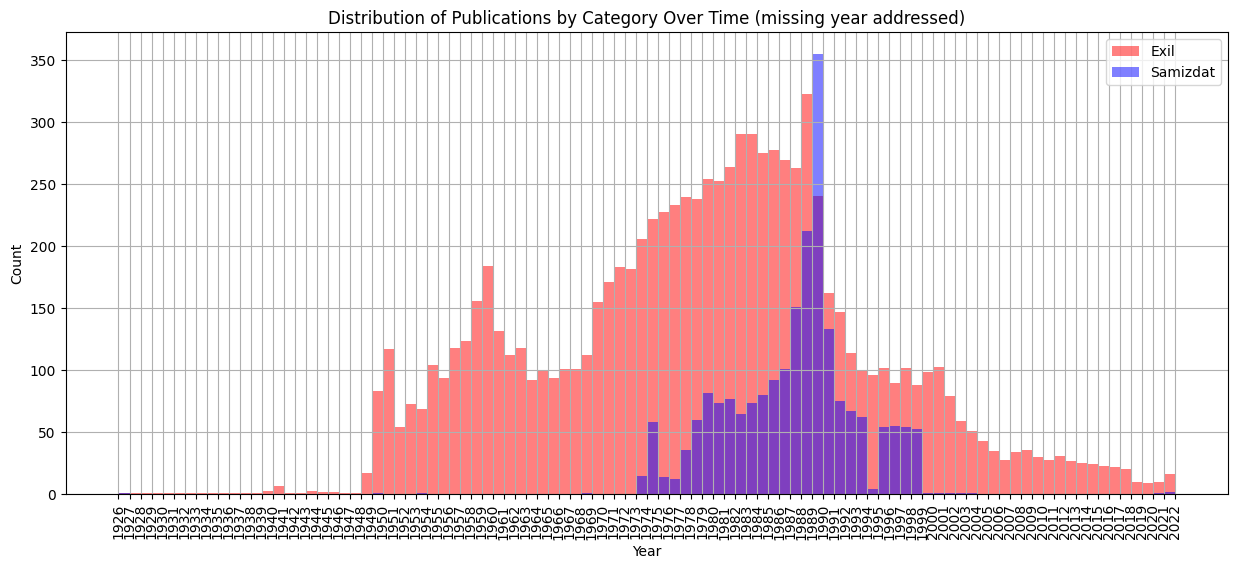

In [66]:
# Plot distribution of samizdat and exil over years
plt.figure(figsize=(15,6))
MIN_YEAR = int(scriptum_df[scriptum_df.periodical_category == 'samizdat'].year.min())
MAX_YEAR = int(scriptum_df[scriptum_df.periodical_category == 'samizdat'].year.max())
bins = range(MIN_YEAR, MAX_YEAR+1)

# Plot exil distribution
scriptum_df[scriptum_df.periodical_category == "exil"]["year"].hist(
    bins=bins,
    color="red", 
    alpha=0.5,
    label="Exil"
)

# Plot samizdat distribution
scriptum_df[scriptum_df.periodical_category == "samizdat"]["year"].hist(
    bins=bins, 
    color="blue", 
    alpha=0.5,
    label="Samizdat"
)

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution of Publications by Category Over Time (missing year addressed)")
plt.legend()
plt.xticks(bins, rotation=90)

### Reducing to relevant year range

In [67]:
print(scriptum_df.shape[0])
scriptum_df = scriptum_df[(1970 <= scriptum_df.year) & (scriptum_df.year <= 1999)]
print(scriptum_df.shape[0])

11614
8122


Text(0.5, 0.98, 'Comparison of Samizdat and Exil Publications (1970-1999)')

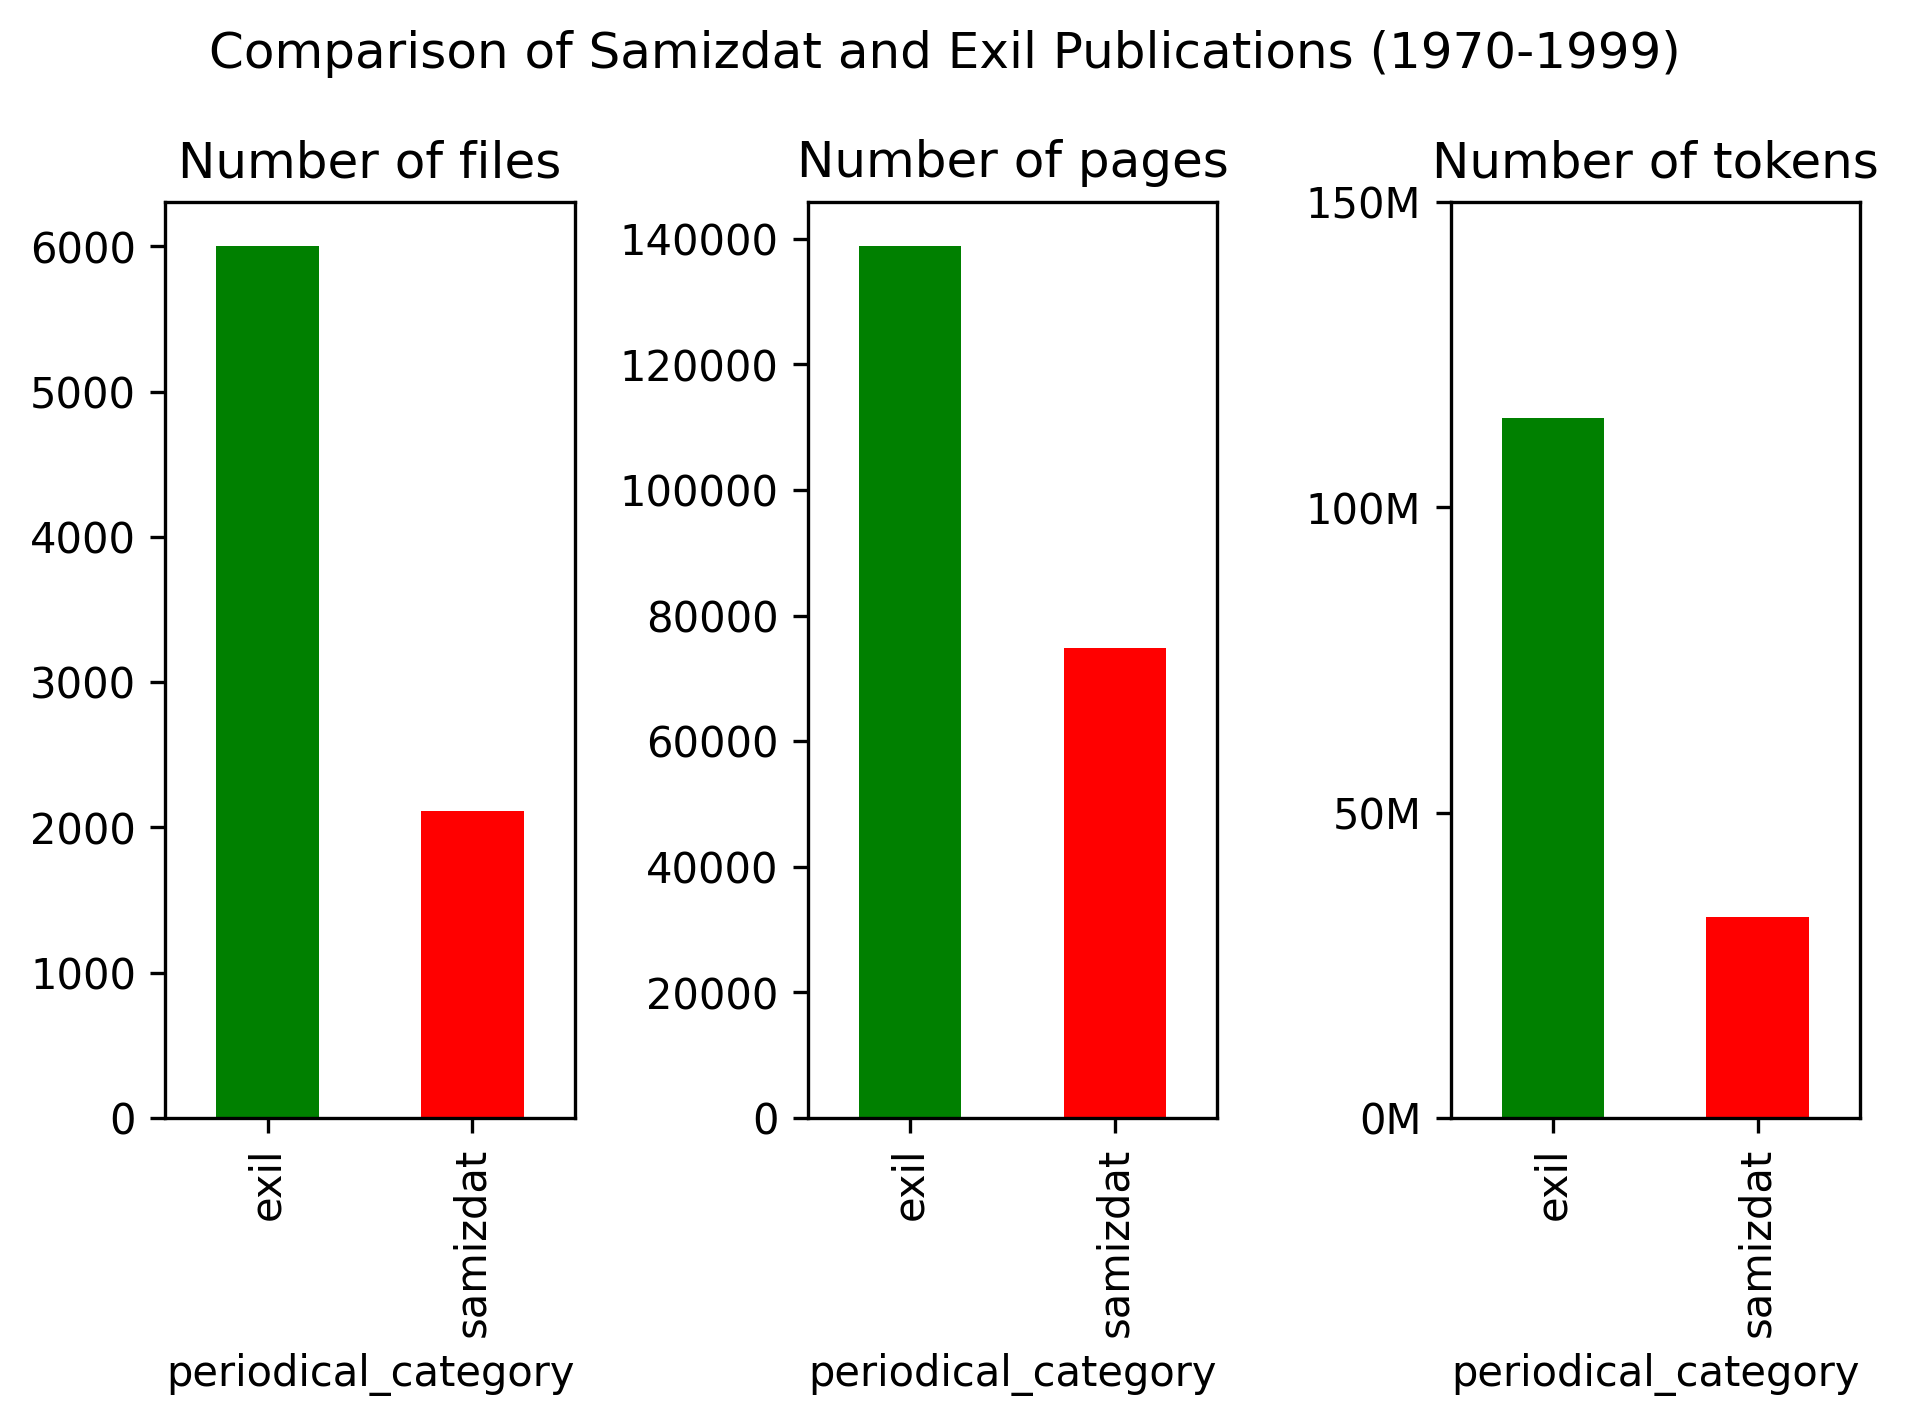

In [68]:
fig, axs = plt.subplots(nrows=1, ncols=3, dpi=300, tight_layout=True)
scriptum_df.groupby("periodical_category").size().plot(kind='bar', color=["green", "red"], ax=axs[0])
scriptum_df.groupby("periodical_category")["pages_N"].sum().plot(kind='bar', color=["green", "red"], ax=axs[1])
scriptum_df.groupby("periodical_category")["tokens_N"].sum().plot(kind='bar', color=["green", "red"], ax=axs[2])

axs[0].set_title("Number of files")
axs[1].set_title("Number of pages")
axs[2].set_title("Number of tokens")

axs[2].set_yticks(range(0,200000000, 50000000))
axs[2].set_yticklabels([str(n)+ "M" for n in range(0,200, 50)])

plt.suptitle("Comparison of Samizdat and Exil Publications (1970-1999)")

### Temporal overview

[Text(0, 0, '0M'),
 Text(0, 20000000, '20M'),
 Text(0, 40000000, '40M'),
 Text(0, 60000000, '60M'),
 Text(0, 80000000, '80M')]

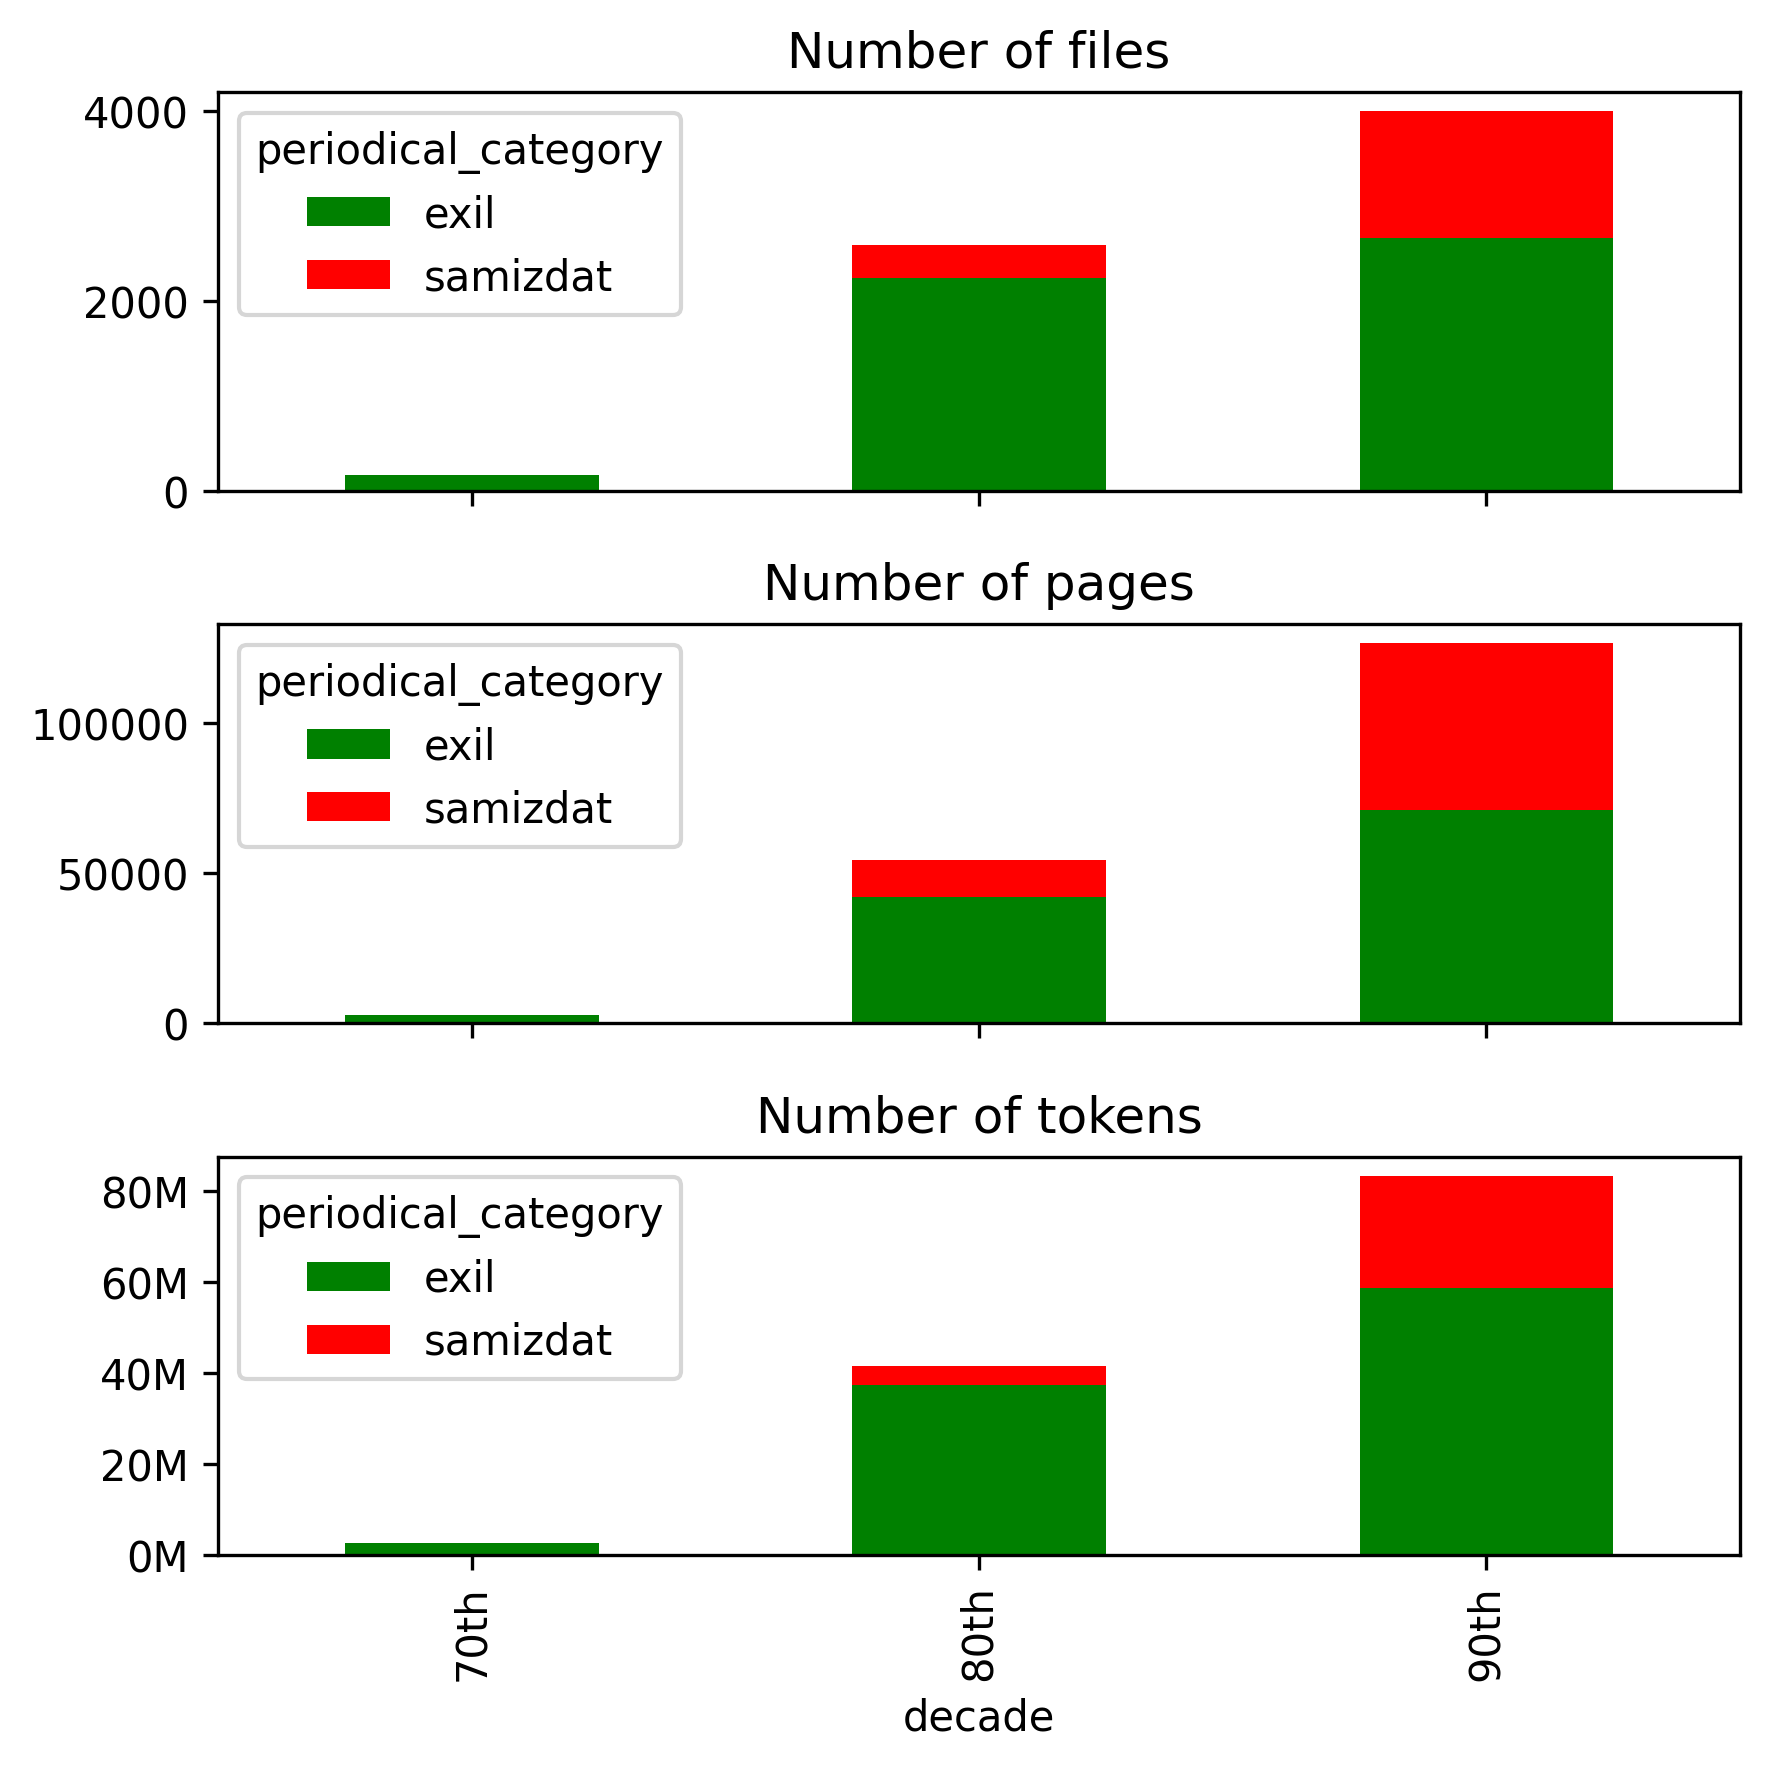

In [33]:
decade_bins = np.arange(1970, 2000, 10)
decades_labels = ["70th", "80th", "90th"]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(6,6), dpi=300, tight_layout=True)
decade_bins = np.arange(1940, 2000, 10)
periodical_decade_counts = scriptum_df.groupby(['periodical_category', pd.cut(scriptum_df['year'], bins=decade_bins)], observed=True).size()
periodical_decade_counts.unstack(level=0).plot(kind='bar', stacked=True, color=["green", "red"], ax=axs[0])
axs[0].set_title("Number of files")
axs[0].set_xticklabels([])
axs[0].set_xlabel("")

periodical_decade_counts = scriptum_df.groupby(['periodical_category', pd.cut(scriptum_df['year'], bins=decade_bins)], observed=True)["pages_N"].sum()
periodical_decade_counts.unstack(level=0).plot(kind='bar', stacked=True, color=["green", "red"], ax=axs[1])
axs[1].set_title("Number of pages")
axs[1].set_xticklabels([])
axs[1].set_xlabel("")


periodical_decade_counts = scriptum_df.groupby(['periodical_category', pd.cut(scriptum_df['year'], bins=decade_bins)], observed=True)["tokens_N"].sum()
periodical_decade_counts.unstack(level=0).plot(kind='bar', stacked=True, color=["green", "red"], ax=axs[2])
axs[2].set_title("Number of tokens")
axs[2].set_xticklabels(decades_labels)
axs[2].set_xlabel("decade")
axs[2].set_yticks(range(0,100000000, 20000000))
axs[2].set_yticklabels([str(n)+ "M" for n in range(0,100, 20)])


### Most prominent periodicals

[Text(0, 0, '0M'),
 Text(1000000, 0, '1M'),
 Text(2000000, 0, '2M'),
 Text(3000000, 0, '3M')]

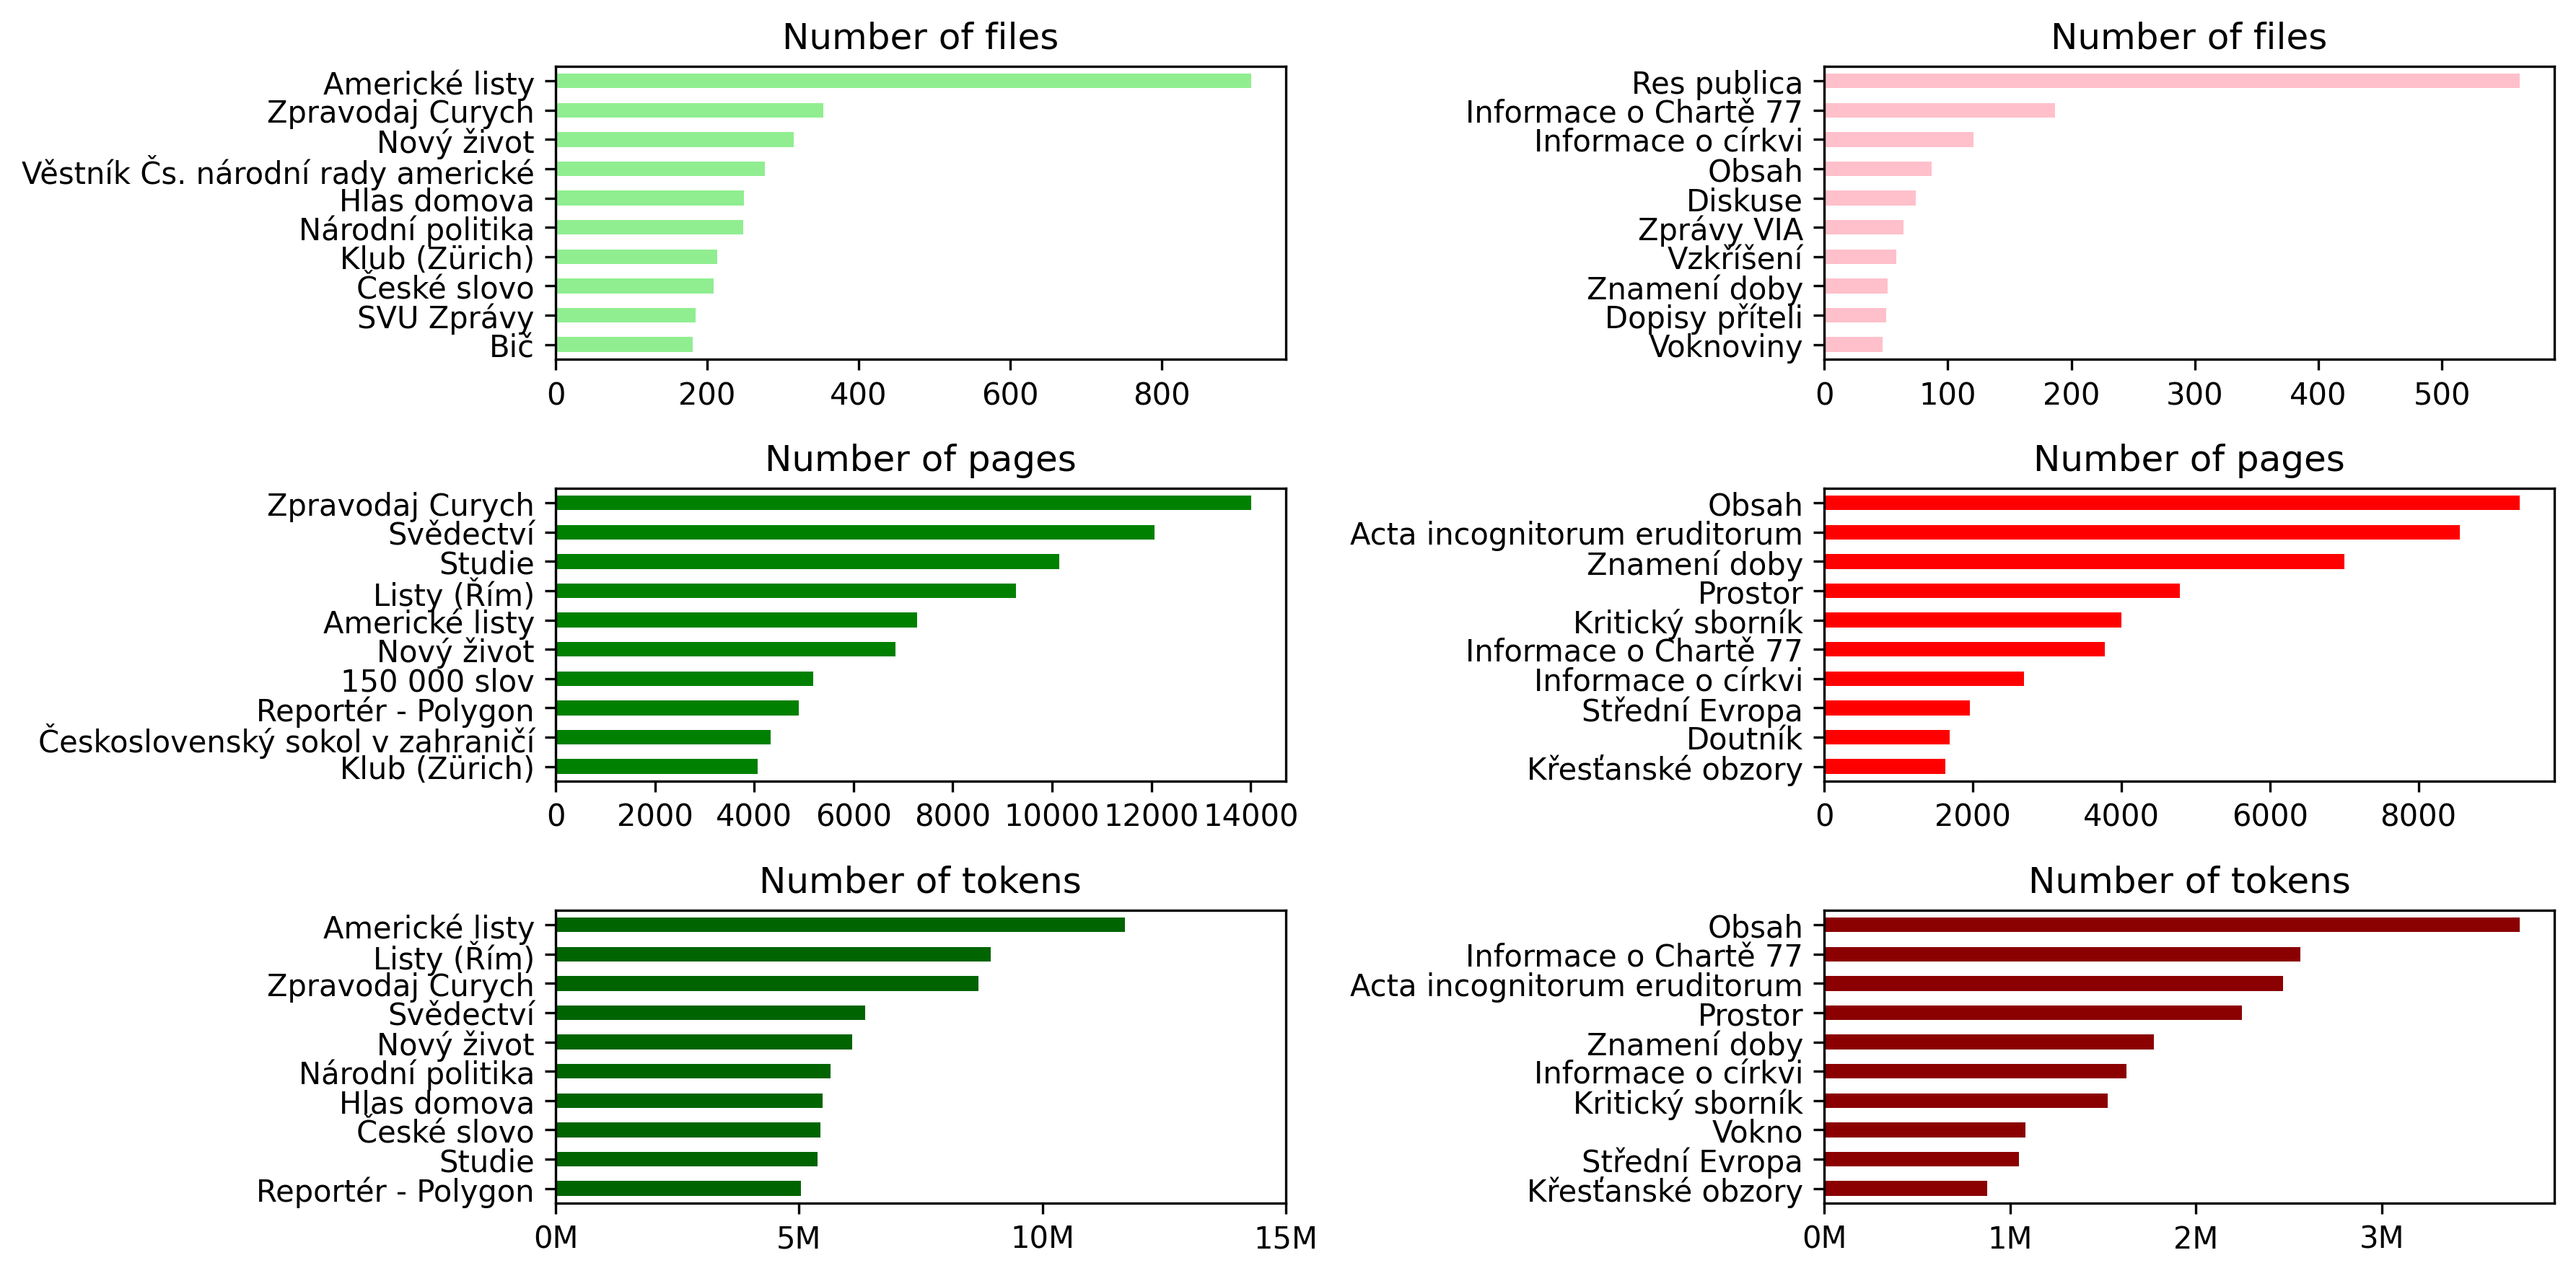

In [69]:
NUM_PERIODICS_SHOW = 10

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12,6), dpi=300, tight_layout=True)
scriptum_df[scriptum_df["periodical_category"]=="exil"].groupby("periodical_title").size().sort_values(ascending=True).tail(NUM_PERIODICS_SHOW).plot(kind='barh', color="lightgreen", ax=axs[0, 0])
axs[0, 0].set_title("Number of files")
axs[0, 0].set_ylabel("")

scriptum_df[scriptum_df["periodical_category"]=="exil"].groupby("periodical_title")["pages_N"].sum().sort_values(ascending=True).tail(NUM_PERIODICS_SHOW).plot(kind='barh', color="green", ax=axs[1,0])
axs[1, 0].set_title("Number of pages")
axs[1, 0].set_ylabel("")

scriptum_df[scriptum_df["periodical_category"]=="exil"].groupby("periodical_title")["tokens_N"].sum().sort_values(ascending=True).tail(NUM_PERIODICS_SHOW).plot(kind='barh', color="darkgreen", ax=axs[2,0])
axs[2, 0].set_title("Number of tokens")
axs[2, 0].set_ylabel("")
axs[2, 0].set_xticks(range(0,20000000, 5000000))
axs[2, 0].set_xticklabels([str(n)+ "M" for n in range(0,20, 5)])

scriptum_df[scriptum_df["periodical_category"]=="samizdat"].groupby("periodical_title").size().sort_values(ascending=True).tail(NUM_PERIODICS_SHOW).plot(kind='barh', color="pink", ax=axs[0, 1])
axs[0, 1].set_title("Number of files")
axs[0, 1].set_ylabel("")

scriptum_df[scriptum_df["periodical_category"]=="samizdat"].groupby("periodical_title")["pages_N"].sum().sort_values(ascending=True).tail(NUM_PERIODICS_SHOW).plot(kind='barh', color="red", ax=axs[1, 1])
axs[1, 1].set_title("Number of pages")
axs[1, 1].set_ylabel("")

scriptum_df[scriptum_df["periodical_category"]=="samizdat"].groupby("periodical_title")["tokens_N"].sum().sort_values(ascending=True).tail(NUM_PERIODICS_SHOW).plot(kind='barh', color="darkred", ax=axs[2, 1])
axs[2, 1].set_title("Number of tokens")
axs[2, 1].set_ylabel("")
axs[2, 1].set_xticks(range(0,4000000, 1000000))
axs[2, 1].set_xticklabels([str(n)+ "M" for n in range(0,4)])